# Challenge Set 8 - Classification challenges

In [17]:
import pandas as pd
import html5lib
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import dateutil

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression

%matplotlib inline

from sklearn.metrics import r2_score

# import statsmodels.api as sm

# import seaborn as sns

# import patsy
# from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from 

In [18]:
df = pd.read_csv("D:/OneDrive/thisismetis/sf17_ds8_workingdirectory/challenges/challeges_questions/07-classification/house-votes-84.data")

In [19]:
# df = pd.read_csv("C:/Users/aj282_000/OneDrive/thisismetis/sf17_ds8_workingdirectory/challenges/challeges_questions/07-classification/house-votes-84.data")

In [20]:
df.columns = ['Party', 'Vote1', 'Vote2', 'Vote3', 'Vote4','Vote5','Vote6','Vote7','Vote8','Vote9','Vote10','Vote11','Vote12','Vote13','Vote14','Vote15', 'Vote16']

In [21]:
df.head()

,Party,Vote1,Vote2,Vote3,Vote4,Vote5,Vote6,Vote7,Vote8,Vote9,Vote10,Vote11,Vote12,Vote13,Vote14,Vote15,Vote16
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [22]:
for i in range(1,len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].map({'n': 0, 'y': 1})

In [23]:
df['Party'] = df['Party'].map({'republican': 0, 'democrat': 1})

In [24]:
for i in range(1,len(df.columns)):
    mean = df.iloc[:,i].mean()
    std = df.iloc[:,i].std()
    normaldist = np.random.normal(mean, std, 1000)
    s = int(np.random.choice(normaldist, 1))
    df.iloc[:,i].fillna(s, inplace=True)

In [25]:
X =  df.iloc[:,1:]
y = df['Party']

#### Challenge 1 & 2

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [27]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4444)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    precision = (conf[0, 0] / (conf[0, 0] + conf[1, 0]))
    recall = (conf[0, 0] / (conf[0, 0] + conf[0, 1]))
    F1 = 2 * (precision * recall) / (precision + recall)
    
    print(conf)

    print ('\n')
    print ("Precision:          %0.2f" %precision)
    print ("Recall:             %0.2f"%recall )
    print ("F1:                 %0.2f"%F1 )
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.94
Test Data Accuracy:     0.91
[[48  4]
 [ 8 71]]


Precision:          0.86
Recall:             0.92
F1:                 0.89


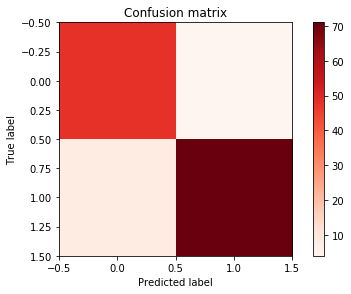

In [28]:
knc_clf=KNeighborsClassifier(n_neighbors=7)
train_score(knc_clf,X,y)

In [29]:
knc_model = KNeighborsClassifier(n_neighbors=7)
knc_model.fit(X_train,y_train)
test_set_pred = knc_model.predict(X_test)
y_score=knc_model.predict_proba(X_test)[:,1]
acc_score = accuracy_score(y_test, test_set_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


print ("Accuracy Score:              %0.2f" %acc_score)
print ("AUC:                 %0.2f"%roc_auc )

Accuracy Score:              0.91
AUC:                 0.96


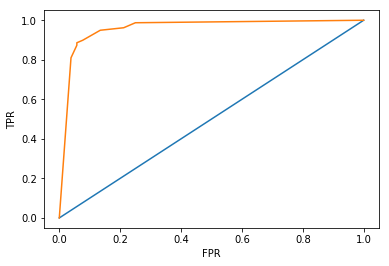

In [30]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Training Data Accuracy: 0.97
Test Data Accuracy:     0.95
[[48  4]
 [ 3 76]]


Precision:          0.94
Recall:             0.92
F1:                 0.93


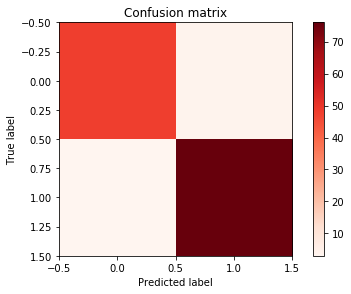

In [31]:
log_clf=LogisticRegression()
train_score(log_clf,X,y)

In [32]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
test_set_pred = lr_model.predict(X_test)
y_score=knc_model.predict_proba(X_test)[:,1]
acc_score = accuracy_score(y_test, test_set_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


print ("Accuracy Score:      %0.2f" %acc_score)
print ("AUC:                 %0.2f"%roc_auc )

Accuracy Score:      0.95
AUC:                 0.96


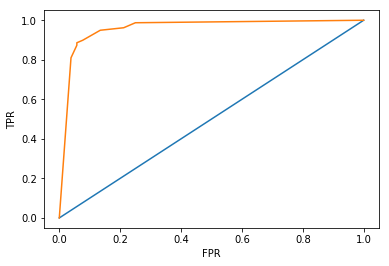

In [33]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Training Data Accuracy: 0.96
Test Data Accuracy:     0.92
[[46  6]
 [ 5 74]]


Precision:          0.90
Recall:             0.88
F1:                 0.89


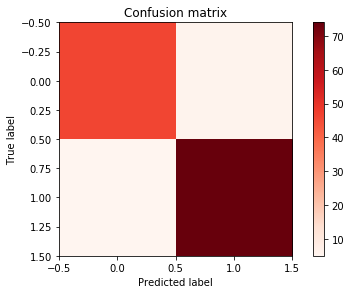

In [34]:
from sklearn.naive_bayes import GaussianNB

gnb_clf=GaussianNB()
train_score(gnb_clf,X,y)

In [35]:

gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
test_set_pred = gnb_model.predict(X_test)
y_score=knc_model.predict_proba(X_test)[:,1]
acc_score = accuracy_score(y_test, test_set_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


print ("Accuracy Score:      %0.2f" %acc_score)
print ("AUC:                 %0.2f"%roc_auc )

Accuracy Score:      0.92
AUC:                 0.96


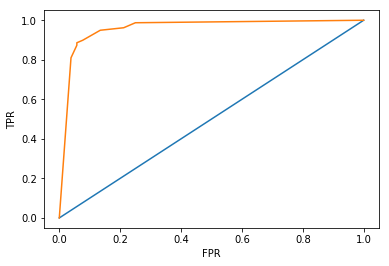

In [36]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Training Data Accuracy: 0.96
Test Data Accuracy:     0.94
[[49  3]
 [ 5 74]]


Precision:          0.91
Recall:             0.94
F1:                 0.92


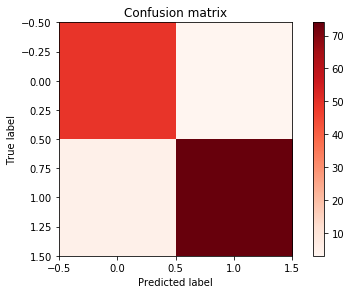

In [37]:
from sklearn.svm import SVC

svc_clf=SVC()
train_score(svc_clf,X,y)

In [38]:

svc_model = SVC()
svc_model.fit(X_train,y_train)
test_set_pred = svc_model.predict(X_test)
y_score=knc_model.predict_proba(X_test)[:,1]
acc_score = accuracy_score(y_test, test_set_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


print ("Accuracy Score:      %0.2f" %acc_score)
print ("AUC:                 %0.2f"%roc_auc )

Accuracy Score:      0.94
AUC:                 0.96


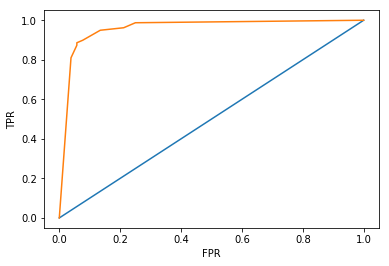

In [39]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Training Data Accuracy: 1.00
Test Data Accuracy:     0.94
[[48  4]
 [ 4 75]]


Precision:          0.92
Recall:             0.92
F1:                 0.92


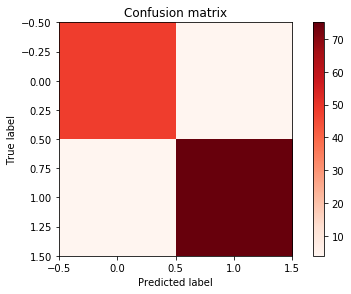

In [40]:
from sklearn.tree import DecisionTreeClassifier

dtc_clf=DecisionTreeClassifier()
train_score(dtc_clf,X,y)

In [41]:


dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
test_set_pred = dtc_model.predict(X_test)
y_score=knc_model.predict_proba(X_test)[:,1]
acc_score = accuracy_score(y_test, test_set_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


print ("Accuracy Score:      %0.2f" %acc_score)
print ("AUC:                 %0.2f"%roc_auc )

Accuracy Score:      0.94
AUC:                 0.96


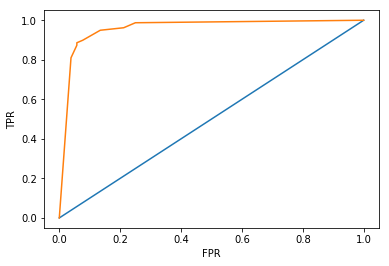

In [42]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Training Data Accuracy: 0.99
Test Data Accuracy:     0.94
[[49  3]
 [ 5 74]]


Precision:          0.91
Recall:             0.94
F1:                 0.92


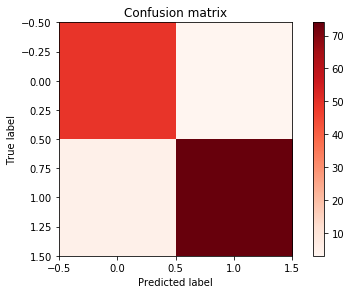

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf=RandomForestClassifier()
train_score(rfc_clf,X,y)

In [44]:


rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
test_set_pred = rfc_model.predict(X_test)
y_score=knc_model.predict_proba(X_test)[:,1]
acc_score = accuracy_score(y_test, test_set_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


print ("Accuracy Score:      %0.2f" %acc_score)
print ("AUC:                 %0.2f"%roc_auc )

Accuracy Score:      0.97
AUC:                 0.96


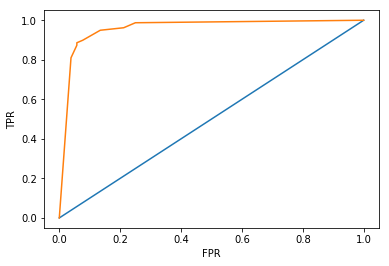

In [45]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

#### Challenge 3

In [46]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def train_score2(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.3, random_state=4444)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    precision = (conf[0, 0] / (conf[0, 0] + conf[1, 0]))
    recall = (conf[0, 0] / (conf[0, 0] + conf[0, 1]))
    F1 = 2 * (precision * recall) / (precision + recall)
    
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %precision)
    print ("Recall:                 %0.2f"%recall )
    print ("F1:                 %0.2f"%F1 )
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.94
Test Data Accuracy:     0.91
[[48  4]
 [ 8 71]]


Precision:              0.86
Recall:                 0.92
F1:                 0.89


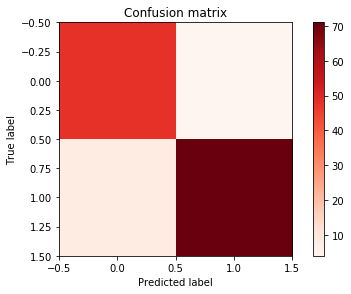

In [47]:
knc_clf=KNeighborsClassifier(n_neighbors=7)
train_score2(knc_clf,X,y)

Training Data Accuracy: 0.97
Test Data Accuracy:     0.95
[[48  4]
 [ 3 76]]


Precision:              0.94
Recall:                 0.92
F1:                 0.93


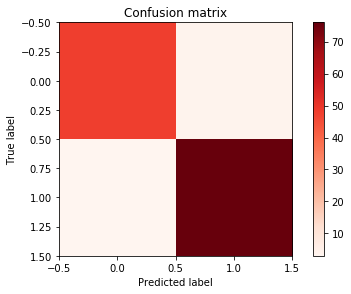

In [48]:
log_clf=LogisticRegression()
train_score2(log_clf,X,y)

Training Data Accuracy: 0.96
Test Data Accuracy:     0.92
[[46  6]
 [ 5 74]]


Precision:              0.90
Recall:                 0.88
F1:                 0.89


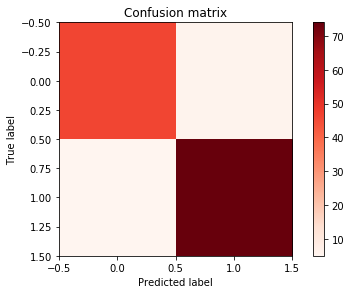

In [49]:
gnb_clf=GaussianNB()
train_score2(gnb_clf,X,y)

Training Data Accuracy: 0.96
Test Data Accuracy:     0.94
[[49  3]
 [ 5 74]]


Precision:              0.91
Recall:                 0.94
F1:                 0.92


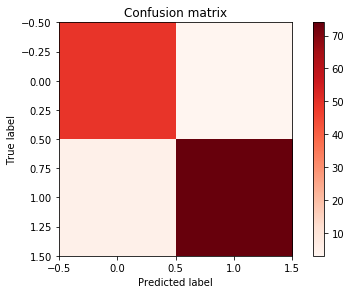

In [50]:
svc_clf=SVC()
train_score2(svc_clf,X,y)

Training Data Accuracy: 1.00
Test Data Accuracy:     0.93
[[46  6]
 [ 3 76]]


Precision:              0.94
Recall:                 0.88
F1:                 0.91


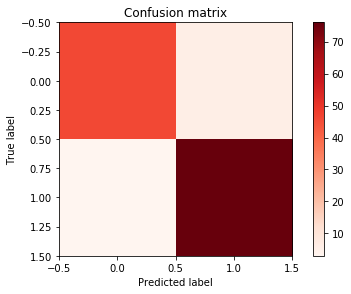

In [51]:
dtc_clf=DecisionTreeClassifier()
train_score2(dtc_clf,X,y)

Training Data Accuracy: 1.00
Test Data Accuracy:     0.95
[[47  5]
 [ 2 77]]


Precision:              0.96
Recall:                 0.90
F1:                 0.93


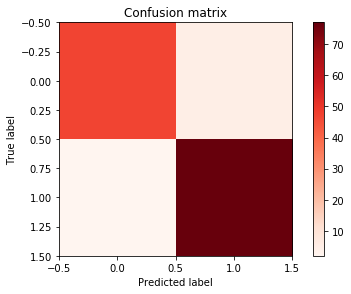

In [52]:
rfc_clf=RandomForestClassifier()
train_score2(rfc_clf,X,y)

#### Challenge 4

In [78]:
df = pd.read_csv("D:/OneDrive/thisismetis/sf17_ds8_workingdirectory/challenges/challenges_data/2013_movies.csv")

In [79]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [80]:
bins = [0, 50000000, 100000000, 200000000, 400000000, 10000000000]
group_names = [0, 1, 2, 3, 4]
df['DomesticTotalGross'] = pd.cut(df['DomesticTotalGross'], bins, labels=group_names)

In [81]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,4,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,4,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,4,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,3,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,3,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [82]:
df2 = pd.get_dummies(df, columns = ['Rating', 'Director'] )

In [83]:
df2 = df2.dropna()

In [84]:
X = df2.iloc[:, 5:]
X['Budget'] = df2['Budget']
X['Runtime'] = df2['Runtime']
y = df2['DomesticTotalGross']

In [86]:
from sklearn.metrics import classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
test_set_pred = lr_model.predict(X_test)
y_score=lr_model.predict_proba(X_test)[:,1]
acc_score = accuracy_score(y_test, test_set_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

print(classification_report(y_test, test_set_pred)) #, target_names=target_names


             precision    recall  f1-score   support

          0       0.81      1.00      0.90        74
          1       1.00      0.06      0.11        18

avg / total       0.85      0.82      0.74        92



In [77]:
# log_clf=LogisticRegression()
# train_score2(log_clf,X,y)

#### Challenge 5

In [61]:
df = pd.read_csv("D:/OneDrive/thisismetis/sf17_ds8_workingdirectory/challenges/challeges_questions/07-classification/haberman.data", header=None)

In [62]:
df.columns = ['Age', 'YearofOp', 'PositiveNodes', 'SurvivalStatus']

In [63]:
df = df.dropna()

In [64]:
df['SurvivalStatus'] = df['SurvivalStatus'].map({1: 0, 2: 1})

In [65]:
X = df.iloc[:,0:3]
y = df['SurvivalStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3,random_state=4444)

In [67]:


lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
test_set_pred = lr_model.predict(X_test)
y_score=lr_model.predict_proba(X_test)[:,1]
acc_score = accuracy_score(y_test, test_set_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


print ("Accuracy Score:      %0.2f" %acc_score)
print ("AUC:                 %0.2f"%roc_auc )

Accuracy Score:      0.82
AUC:                 0.65


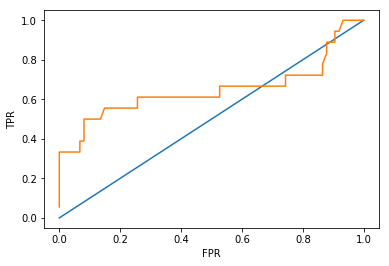

In [68]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')